In [1]:
from PIL import Image
from pathlib import Path
import numpy as np
import xarray as xr

import convorg

%matplotlib inline

In [2]:
import convml_tt
import convml_tt.utils
from convml_tt.architectures.triplet_trainer import monkey_patch_fastai
monkey_patch_fastai()

In [3]:
tile_path = Path('data/Nx256_s200000.0_N500study_N2000train/train/')

In [4]:
images = list(tile_path.glob("*.png"))
len(images)

6000

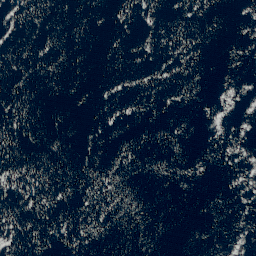

In [5]:
img = Image.open(images[2])
img

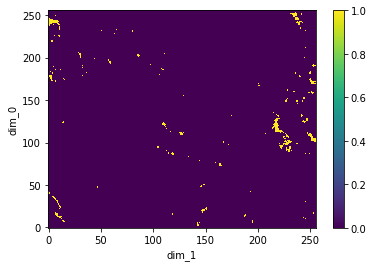

In [6]:
da_img_gs = xr.DataArray(np.array(img.convert('LA'))[...,0])
da_mask = da_img_gs > 160.
da_mask.plot()

In [7]:
convorg.iorg(da_mask.values)

0.7776241848890765

In [8]:
convorg.scai(da_mask.values)

1.37267015953158

# deciding on mask threshold

In [9]:
fracs = np.arange(30, 200., 10)
iorg_vals = [
    convorg.iorg((da_img_gs > s).values)
    for s in fracs
]



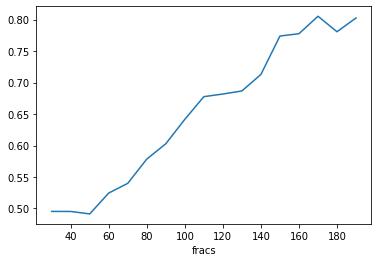

In [10]:
xr.DataArray(
    iorg_vals, dims=('fracs',), coords=dict(fracs=fracs)
).plot()

In [11]:
fracs = np.arange(30, 200., 10)
scai_vals = [
    convorg.scai((da_img_gs > s).values)
    for s in fracs
]



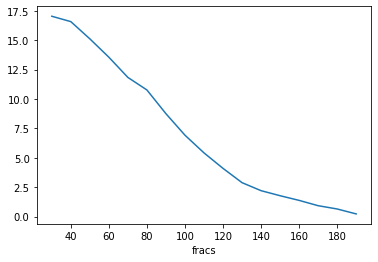

In [12]:
xr.DataArray(
    scai_vals, dims=('fracs',), coords=dict(fracs=fracs)
).plot()

In [13]:
def calc_conv_org_coeffs(img, greyscale_threshold=120.):
    da_img_gs = xr.DataArray(np.array(img.convert('LA'))[...,0])
    da_mask = da_img_gs > greyscale_threshold
    
    ds = xr.merge([
        xr.DataArray(
            convorg.iorg(da_mask.values),
            name='iorg'
        ),
        xr.DataArray(
            convorg.scai(da_mask.values),
            name='scai'
        ),
    ])
    ds.attrs['greyscale_threshold'] = greyscale_threshold
    return ds
    
calc_conv_org_coeffs(img)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    iorg     float64 0.6818
    scai     float64 4.097
Attributes:
    greyscale_threshold:  120.0

In [14]:
import convml_tt.interpretation.tile_aggregation
from convml_tt.interpretation.tile_aggregation import load_tile_definitions, aggregate_fn_over_tiles

In [15]:
triplets = convml_tt.NPMultiImageList.from_folder(tile_path)

In [16]:
%load_ext autoreload
%autoreload 2

In [17]:
method_name = 'conv_org_coeffs'
ds_org = aggregate_fn_over_tiles(triplets, 'conv_org_coeffs', method_kwargs=dict(greyscale_threshold=100.))

 12%|█▏        | 230/2000 [01:00<06:38,  4.45it/s]/Users/leifdenby/miniconda3/envs/convml_tt/lib/python3.7/site-packages/scipy/stats/stats.py:317: RuntimeWarning: Mean of empty slice.
  return np.exp(log_a.mean(axis=axis))
/Users/leifdenby/miniconda3/envs/convml_tt/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 2000/2000 [09:23<00:00,  2.23it/s]


In [18]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


(array([111., 104., 153., 151., 179., 198., 185., 153., 129., 122., 115.,  77.,  60.,  48.,  48.,  28.,  16.,  17.,
         13.,  18.,  10.,   6.,   8.,  10.,   2.,   6.,   6.,   4.,   2.,   3.,   1.,   1.,   2.,   2.,   1.,   1.,
          1.,   0.,   0.,   1.]),
 array([7.756028e-03, 6.714383e-01, 1.335121e+00, 1.998803e+00, 2.662485e+00, 3.326168e+00, 3.989850e+00, 4.653532e+00,
        5.317215e+00, 5.980897e+00, 6.644579e+00, 7.308261e+00, 7.971944e+00, 8.635626e+00, 9.299308e+00, 9.962991e+00,
        1.062667e+01, 1.129036e+01, 1.195404e+01, 1.261772e+01, 1.328140e+01, 1.394508e+01, 1.460877e+01, 1.527245e+01,
        1.593613e+01, 1.659981e+01, 1.726350e+01, 1.792718e+01, 1.859086e+01, 1.925454e+01, 1.991823e+01, 2.058191e+01,
        2.124559e+01, 2.190927e+01, 2.257295e+01, 2.323664e+01, 2.390032e+01, 2.456400e+01, 2.522768e+01, 2.589137e+01,
        2.655505e+01]),
 <a list of 40 Patch objects>)

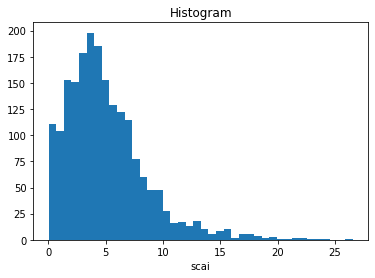

In [19]:
ds_org.scai.plot.hist(bins=40)

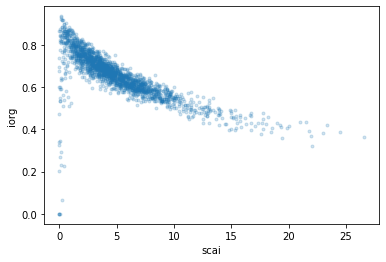

In [20]:
ds_org.swap_dims(dict(tile_id='scai')).iorg.plot(marker='.', linestyle='', alpha=0.2)

In [21]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


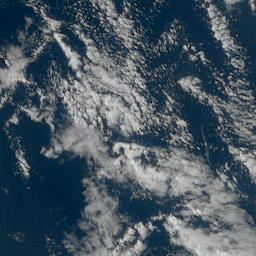

In [22]:
img_fastai = triplets[0][0]
img_fastai

In [23]:
type(img_fastai.data)

torch.Tensor

In [24]:
Image.fromarray

<function PIL.Image.fromarray(obj, mode=None)>